In [11]:
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np
import glob
import os
import re

import spacy
import string
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
import en_core_web_sm
import re
import datetime
from afinn import Afinn
tqdm.pandas()

nlp = spacy.load("en_core_web_sm")

In [12]:
df_quote = pd.read_csv('/Users/yli17/Downloads/50moviesquotes.csv', error_bad_lines=False)
df_quote.head()

,Unnamed: 0,Unnamed: 0.1,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,primaryTitle
0,0,6492,2015-12-31-028469,I want to clarify my interview on the `Charlie...,George Lucas,"['Q1507803', 'Q38222']",2015-12-31 16:48:00,7,"[['George Lucas', '0.5327'], ['None', '0.4248'...",['http://www.escapistmagazine.com/news/view/16...,E,Star Wars: Episode VII - The Force Awakens
1,1,9488,2015-12-18-058761,"It's the dawn of a new Star Wars era,",None,[],2015-12-18 12:55:59,1,"[['None', '0.9462'], ['george lucas', '0.0538']]",['http://carbonated.tv/viral/australian-couple...,E,Star Wars: Episode VII - The Force Awakens
2,2,11653,2015-12-21-084512,"They were saying, `Well, since when has Star W...",J.J. Abrams,['Q188137'],2015-12-21 08:04:49,1,"[['J.J. Abrams', '0.5868'], ['None', '0.2584']...",['http://rssfeeds.usatoday.com/~/129385923/0/u...,E,Star Wars: Episode VII - The Force Awakens
3,3,16795,2015-12-16-003799,Advertisers that used the force ahead of the S...,None,[],2015-12-16 22:57:43,1,"[['None', '0.8848'], ['Laurent Simon', '0.1152']]",['http://www.adweek.com/agencyspy/wednesday-od...,E,Star Wars: Episode VII - The Force Awakens
4,4,34090,2015-12-16-097475,The first Star Wars film was widely advertised...,Andy Summers,['Q315758'],2015-12-16 05:13:50,1,"[['Andy Summers', '0.6693'], ['None', '0.2707'...",['http://bournemouthecho.co.uk/news/14146562.T...,E,Star Wars: Episode VII - The Force Awakens


In [13]:
df_quote = df_quote[["quotation", "speaker", "date", "numOccurrences", "primaryTitle"]]

In [14]:
df_movie = pd.read_csv('/Users/yli17/Downloads/movie_data_2015_2020.csv', error_bad_lines=False)
df_movie.head()

,Unnamed: 0,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,...,ordering_y,nconst,category,job,characters,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,0,tt1179933,movie,10 Cloverfield Lane,10 Cloverfield Lane,0.0,2016.0,NaN,103.0,"Action,Drama,Horror",...,10.0,nm6618222,producer,producer,NaN,Lindsey Weber,NaN,NaN,producer,"tt4530422,tt2660888,tt2548396,tt1179933"
1,1,tt4530422,movie,Overlord,Overlord,0.0,2018.0,NaN,110.0,"Action,Horror,Sci-Fi",...,9.0,nm6618222,producer,producer,NaN,Lindsey Weber,NaN,NaN,producer,"tt4530422,tt2660888,tt2548396,tt1179933"
2,2,tt1179933,movie,10 Cloverfield Lane,10 Cloverfield Lane,0.0,2016.0,NaN,103.0,"Action,Drama,Horror",...,1.0,nm0000422,actor,NaN,"[""Howard""]",John Goodman,1952.0,NaN,"actor,soundtrack,producer","tt0101410,tt1179933,tt1024648,tt1907668"
3,3,tt2406566,movie,Atomic Blonde,Atomic Blonde,0.0,2017.0,NaN,115.0,"Action,Thriller",...,3.0,nm0000422,actor,NaN,"[""Emmett Kurzfeld""]",John Goodman,1952.0,NaN,"actor,soundtrack,producer","tt0101410,tt1179933,tt1024648,tt1907668"
4,4,tt5968394,movie,Captive State,Captive State,0.0,2019.0,NaN,109.0,"Action,Horror,Sci-Fi",...,1.0,nm0000422,actor,NaN,"[""William Mulligan""]",John Goodman,1952.0,NaN,"actor,soundtrack,producer","tt0101410,tt1179933,tt1024648,tt1907668"


In [15]:
df_movie = df_movie[["primaryTitle", "startYear", "genres", "Total Gross"]]

In [16]:
df_total = pd.merge(df_quote, df_movie, on=["primaryTitle"])
df_total.head()

,quotation,speaker,date,numOccurrences,primaryTitle,startYear,genres,Total Gross
0,I want to clarify my interview on the `Charlie...,George Lucas,2015-12-31 16:48:00,7,Star Wars: Episode VII - The Force Awakens,2015.0,"Action,Adventure,Sci-Fi","$936,662,225"
1,I want to clarify my interview on the `Charlie...,George Lucas,2015-12-31 16:48:00,7,Star Wars: Episode VII - The Force Awakens,2015.0,"Action,Adventure,Sci-Fi","$936,662,225"
2,I want to clarify my interview on the `Charlie...,George Lucas,2015-12-31 16:48:00,7,Star Wars: Episode VII - The Force Awakens,2015.0,"Action,Adventure,Sci-Fi","$936,662,225"
3,I want to clarify my interview on the `Charlie...,George Lucas,2015-12-31 16:48:00,7,Star Wars: Episode VII - The Force Awakens,2015.0,"Action,Adventure,Sci-Fi","$936,662,225"
4,I want to clarify my interview on the `Charlie...,George Lucas,2015-12-31 16:48:00,7,Star Wars: Episode VII - The Force Awakens,2015.0,"Action,Adventure,Sci-Fi","$936,662,225"


In [17]:
def revenue_clean(data):
    data = str(data)
    clean = data.replace('$', '')
    revenue = clean.replace(',', '')
    return revenue

In [18]:
df_total["revenue"] = df_total["Total Gross"].progress_apply(revenue_clean)

  0%|          | 0/9320180 [00:00<?, ?it/s]

In [20]:
df_total["revenue"] = df_total["revenue"].astype(int)
df_total.dtypes

quotation          object
speaker            object
date               object
numOccurrences      int64
primaryTitle       object
startYear         float64
genres             object
Total Gross        object
revenue             int64
dtype: object

In [23]:
df_total["revenue"].median()

270395425.0

In [28]:
df_high = df_total[df_total["revenue"]>270395425]
df_high["success"] = "high"

df_low = df_total[df_total["revenue"]<=270395425]
df_low["success"] = "low"

df_new = pd.concat([df_high, df_low])
df_ready = df_new.drop_duplicates()
df_ready

/var/folders/_j/mtdz_6x90ks158_q3rnzw_s00000gq/T/ipykernel_5917/1154694584.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high["success"] = "high"
/var/folders/_j/mtdz_6x90ks158_q3rnzw_s00000gq/T/ipykernel_5917/1154694584.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_low["success"] = "low"


,quotation,speaker,date,numOccurrences,primaryTitle,startYear,genres,Total Gross,revenue,success
0,I want to clarify my interview on the `Charlie...,George Lucas,2015-12-31 16:48:00,7,Star Wars: Episode VII - The Force Awakens,2015.0,"Action,Adventure,Sci-Fi","$936,662,225",936662225,high
10,"It's the dawn of a new Star Wars era,",None,2015-12-18 12:55:59,1,Star Wars: Episode VII - The Force Awakens,2015.0,"Action,Adventure,Sci-Fi","$936,662,225",936662225,high
20,"They were saying, `Well, since when has Star W...",J.J. Abrams,2015-12-21 08:04:49,1,Star Wars: Episode VII - The Force Awakens,2015.0,"Action,Adventure,Sci-Fi","$936,662,225",936662225,high
30,Advertisers that used the force ahead of the S...,None,2015-12-16 22:57:43,1,Star Wars: Episode VII - The Force Awakens,2015.0,"Action,Adventure,Sci-Fi","$936,662,225",936662225,high
40,The first Star Wars film was widely advertised...,Andy Summers,2015-12-16 05:13:50,1,Star Wars: Episode VII - The Force Awakens,2015.0,"Action,Adventure,Sci-Fi","$936,662,225",936662225,high
...,...,...,...,...,...,...,...,...,...,...
9320130,evil versions of Wonder Woman and other member...,Barry Allen,2018-02-22 17:11:40,1,Justice League,2017.0,"Action,Adventure,Fantasy","$229,024,295",229024295,low
9320140,We saw a glimpse of it in the nightmare sequen...,Michael Wilkinson,2018-03-23 15:30:59,1,Justice League,2017.0,"Action,Adventure,Fantasy","$229,024,295",229024295,low
9320150,Will Australia get Justice League?,Owen Gleiberman,2018-04-16 13:57:35,2,Justice League,2017.0,"Action,Adventure,Fantasy","$229,024,295",229024295,low
9320160,Justice League has been the golden ring for me...,Scott Snyder,2018-03-19 13:03:21,10,Justice League,2017.0,"Action,Adventure,Fantasy","$229,024,295",229024295,low


In [30]:
nlp = en_core_web_sm.load()

punctuations = string.punctuation
#stopwords = list(STOP_WORDS)

parser = nlp
def spacy_tokenizer(sentence):
    tokens = parser(sentence)
    tokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in tokens ]
    tokens = [ word for word in tokens if word not in punctuations ]
    tokens = " ".join([i for i in tokens])
    return tokens

In [31]:
df_ready["text_clean"] = df_ready["quotation"].progress_apply(spacy_tokenizer)

df_ready["text"] = df_ready["text_clean"].astype('str')

  0%|          | 0/932018 [00:00<?, ?it/s]

/var/folders/_j/mtdz_6x90ks158_q3rnzw_s00000gq/T/ipykernel_5917/3205450645.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ready["text_clean"] = df_ready["quotation"].progress_apply(spacy_tokenizer)
/var/folders/_j/mtdz_6x90ks158_q3rnzw_s00000gq/T/ipykernel_5917/3205450645.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ready["text"] = df_ready["text_clean"].astype('str')


In [32]:
#/Users/yli17/Desktop/ADA_data
df_ready.to_csv('/Users/yli17/Desktop/ADA_data/text_clean.csv')

**Dataset can be downloaded here:**
https://drive.google.com/drive/folders/1yzUzz3PX5bcFOYbsMnonfRqtEK2xU1jc?usp=sharing

In [33]:
from empath import Empath
lexicon = Empath()

results=[]
for i in df_ready["text"]:
    experience = lexicon.analyze(i,categories = ["warmth", "fun", "emotional", "disappointment", "love", "hate"])
    results.append(experience)

records = pd.DataFrame() 
for i in results:
    dataframe = pd.DataFrame.from_dict(i, orient="index")
    new_data = dataframe.transpose()
    records = records.append(new_data)

records

,warmth,fun,emotional,disappointment,love,hate
0,0.0,2.0,0.0,0.0,1.0,1.0
0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,2.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
records['index'] = np.arange(len(records))
df_ready['index'] = np.arange(len(df_ready))
df_final = pd.merge(df_ready, records, on=["index"])

/var/folders/_j/mtdz_6x90ks158_q3rnzw_s00000gq/T/ipykernel_5917/3191418437.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ready['index'] = np.arange(len(df_ready))


In [35]:
df_final.to_csv('/Users/yli17/Desktop/ADA_data/text_final.csv')

**Dataset can be downloaded here:**
https://drive.google.com/drive/folders/1yzUzz3PX5bcFOYbsMnonfRqtEK2xU1jc?usp=sharing

In [36]:
df_w = df_final[["warmth","success"]]
df_w["category"]= "warmth"
df_w = df_w.rename(columns={"warmth": "value"})

df_f = df_final[["fun","success"]]
df_f["category"]= "fun"
df_f = df_f.rename(columns={"fun": "value"})

df_e = df_final[["emotional","success"]]
df_e["category"]= "emotional"
df_e = df_e.rename(columns={"emotional": "value"})

df_d = df_final[["disappointment","success"]]
df_d["category"]= "disappointment"
df_d = df_d.rename(columns={"disappointment": "value"})

df_l = df_final[["love","success"]]
df_l["category"]= "love"
df_l = df_e.rename(columns={"love": "value"})

df_h = df_final[["hate","success"]]
df_h["category"]= "hate"
df_h = df_e.rename(columns={"hate": "value"})

/var/folders/_j/mtdz_6x90ks158_q3rnzw_s00000gq/T/ipykernel_5917/3199555629.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_w["category"]= "warmth"
/var/folders/_j/mtdz_6x90ks158_q3rnzw_s00000gq/T/ipykernel_5917/3199555629.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f["category"]= "fun"
/var/folders/_j/mtdz_6x90ks158_q3rnzw_s00000gq/T/ipykernel_5917/3199555629.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [37]:
df_plot = pd.concat([df_w,df_f,df_e,df_d,df_l,df_h])
df_plot.head()

,value,success,category
0,0.0,high,warmth
1,0.0,high,warmth
2,0.0,high,warmth
3,0.0,high,warmth
4,0.0,high,warmth


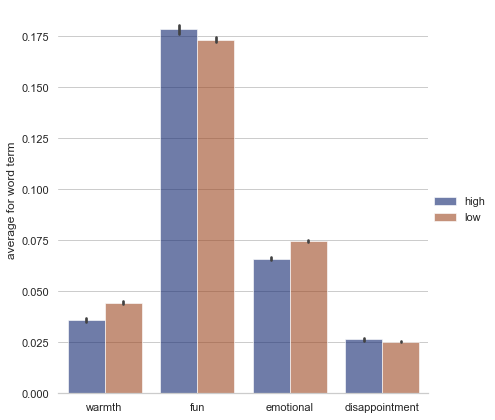

In [38]:
import seaborn as sns
sns.set_theme(style="whitegrid")

g = sns.catplot(
    data=df_plot, kind="bar",
    x="category", y="value", hue="success",
    palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "average for word term")
g.legend.set_title("")

(0.0, 0.5)

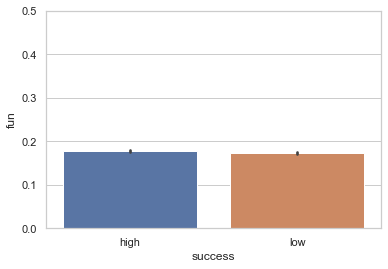

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

ax = sns.barplot(x="success", y="fun", data=df_final)
plt.ylim([0,0.5])

In [52]:
df_final["warmth"] = df_final["warmth"].astype(int)
df_final["fun"] = df_final["fun"].astype(int)
df_final["emotional"] = df_final["emotional"].astype(int)
df_final["disappointment"] = df_final["disappointment"].astype(int)
df_final["love"] = df_final["love"].astype(int)
df_final["hate"] = df_final["hate"].astype(int)

In [53]:
df_final['warmth_st'] = (df_final['warmth'] - df_final['warmth'].mean())/df_final['warmth'].std()
df_final['fun_st'] = (df_final['fun'] - df_final['fun'].mean())/df_final['fun'].std()
df_final['emotional_st'] = (df_final['emotional'] - df_final['emotional'].mean())/df_final['emotional'].std()
df_final['disappointment_st'] = (df_final['disappointment'] - df_final['disappointment'].mean())/df_final['disappointment'].std()
df_final['love_st'] = (df_final['love'] - df_final['love'].mean())/df_final['love'].std()
df_final['hate_st'] = (df_final['hate'] - df_final['hate'].mean())/df_final['hate'].std()

In [54]:
df_final['log_warmth'] = np.log(df_final['warmth_st'] + 1)
df_final['log_fun'] = np.log(df_final['fun_st'] + 1)
df_final['log_emotional'] = np.log(df_final['emotional_st'] + 1)
df_final['log_disappointment'] = np.log(df_final['disappointment_st'] + 1)
df_final['log_love'] = np.log(df_final['love_st'] + 1)
df_final['log_hate'] = np.log(df_final['hate_st'] + 1)

In [55]:
df1 = df_final[df_final["success"].str.contains("high", na=False)]
df1["hit"]=1

df0 = df_final[df_final["success"].str.contains("low", na=False)]
df0["hit"]=0

df_result = pd.concat([df1, df0])
df_result

/var/folders/_j/mtdz_6x90ks158_q3rnzw_s00000gq/T/ipykernel_5917/2992508003.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["hit"]=1
/var/folders/_j/mtdz_6x90ks158_q3rnzw_s00000gq/T/ipykernel_5917/2992508003.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0["hit"]=0


,quotation,speaker,date,numOccurrences,primaryTitle,startYear,genres,Total Gross,revenue,success,...,love_st,hate_st,log_revenue,log_warmth,log_fun,log_emotional,log_disappointment,log_love,log_hate,hit
0,I want to clarify my interview on the `Charlie...,George Lucas,2015-12-31 16:48:00,7,Star Wars: Episode VII - The Force Awakens,2015.0,"Action,Adventure,Sci-Fi","$936,662,225",936662225,high,...,1.862250,3.247780,2.068851,-0.177799,1.470258,-0.27227,-0.162921,1.051608,1.446396,1
1,"It's the dawn of a new Star Wars era,",None,2015-12-18 12:55:59,1,Star Wars: Episode VII - The Force Awakens,2015.0,"Action,Adventure,Sci-Fi","$936,662,225",936662225,high,...,-0.318155,-0.209933,2.068851,-0.177799,-0.385971,-0.27227,-0.162921,-0.382953,-0.235638,1
2,"They were saying, `Well, since when has Star W...",J.J. Abrams,2015-12-21 08:04:49,1,Star Wars: Episode VII - The Force Awakens,2015.0,"Action,Adventure,Sci-Fi","$936,662,225",936662225,high,...,-0.318155,-0.209933,2.068851,-0.177799,-0.385971,-0.27227,-0.162921,-0.382953,-0.235638,1
3,Advertisers that used the force ahead of the S...,None,2015-12-16 22:57:43,1,Star Wars: Episode VII - The Force Awakens,2015.0,"Action,Adventure,Sci-Fi","$936,662,225",936662225,high,...,-0.318155,-0.209933,2.068851,-0.177799,-0.385971,-0.27227,-0.162921,-0.382953,-0.235638,1
4,The first Star Wars film was widely advertised...,Andy Summers,2015-12-16 05:13:50,1,Star Wars: Episode VII - The Force Awakens,2015.0,"Action,Adventure,Sci-Fi","$936,662,225",936662225,high,...,-0.318155,-0.209933,2.068851,-0.177799,1.470258,-0.27227,-0.162921,-0.382953,-0.235638,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932013,evil versions of Wonder Woman and other member...,Barry Allen,2018-02-22 17:11:40,1,Justice League,2017.0,"Action,Adventure,Fantasy","$229,024,295",229024295,low,...,-0.318155,-0.209933,-1.523946,-0.177799,-0.385971,-0.27227,-0.162921,-0.382953,-0.235638,0
932014,We saw a glimpse of it in the nightmare sequen...,Michael Wilkinson,2018-03-23 15:30:59,1,Justice League,2017.0,"Action,Adventure,Fantasy","$229,024,295",229024295,low,...,-0.318155,-0.209933,-1.523946,-0.177799,-0.385971,-0.27227,-0.162921,-0.382953,-0.235638,0
932015,Will Australia get Justice League?,Owen Gleiberman,2018-04-16 13:57:35,2,Justice League,2017.0,"Action,Adventure,Fantasy","$229,024,295",229024295,low,...,-0.318155,-0.209933,-1.523946,-0.177799,-0.385971,-0.27227,-0.162921,-0.382953,-0.235638,0
932016,Justice League has been the golden ring for me...,Scott Snyder,2018-03-19 13:03:21,10,Justice League,2017.0,"Action,Adventure,Fantasy","$229,024,295",229024295,low,...,-0.318155,-0.209933,-1.523946,-0.177799,-0.385971,-0.27227,-0.162921,-0.382953,-0.235638,0


In [56]:
#TO DO: plot some effects 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import math
from statsmodels.stats import diagnostic
from scipy import stats

mod = smf.logit(formula = 'hit ~ log_warmth + log_fun + log_emotional + log_disappointment + log_love + log_hate', data = df_result)
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.574350
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                    hit   No. Observations:               932018
Model:                          Logit   Df Residuals:                   932011
Method:                           MLE   Df Model:                            6
Date:                Thu, 16 Dec 2021   Pseudo R-squ.:               0.0004411
Time:                        02:21:20   Log-Likelihood:            -5.3530e+05
converged:                       True   LL-Null:                   -5.3554e+05
Covariance Type:            nonrobust   LLR p-value:                 7.038e-99
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -1.0550      0.003   -345.907      0.000      -1.061      -1.049
log_w

In [57]:
model = smf.glm(formula = "hit ~ log_warmth + log_fun + log_emotional + log_disappointment + log_love + log_hate", data=df_result, family=sm.families.NegativeBinomial()).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    hit   No. Observations:               932018
Model:                            GLM   Df Residuals:                   932011
Model Family:        NegativeBinomial   Df Model:                            6
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -5.9987e+05
Date:                Thu, 16 Dec 2021   Deviance:                   5.2404e+05
Time:                        02:23:18   Pearson chi2:                 5.46e+05
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -1.3543      0.003   -459.177      0.000      -1.360      -1.349
log_warmth            -0.0771      0.007    -10.840      0.000      -0.091      -0.063
log_fun                0.0220      0.004      4.928      0.000       0.013       0.031
log_emotional         -0.0663      0.006    -11.378      0.000      -0.078      -0.055
log_disappointment     0.0156      0.007      2.238      0.025       0.002       0.029
log_love              -0.0073      0.005     -1.604      0.109      -0.016       0.002
log_hate               0.0192      0.006      3.140      0.002       0.007       0.031
======================================================================================
"""

In [61]:
import patsy
import statsmodels.api as sm
from statsmodels.genmod.families import Poisson

fam = Poisson()
f = 'hit ~ log_warmth + log_fun + log_emotional + log_disappointment + log_love + log_hate'
y, X = patsy.dmatrices(f, data=df_result, return_type='matrix')

p_model = sm.GLM(y, X, family=fam)

result = p_model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    hit   No. Observations:               932018
Model:                            GLM   Df Residuals:                   932011
Model Family:                 Poisson   Df Model:                            6
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -5.7044e+05
Date:                Thu, 16 Dec 2021   Deviance:                   6.5346e+05
Time:                        02:32:22   Pearson chi2:                 6.88e+05
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -1.3544      0